# Chapter 8 - Statistics for Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

## Simple Linear Regression

In [4]:
import yfinance as yf

netflix = yf.Ticker("NFLX")                         # Create a Ticker object for Netflix stock using the Yahoo Finance API

start = "2016-01-01"                                # Define the start date for historical data
end = "2018-01-01"                                  # Define the end date for historical data

# Retrieve the historical daily stock price data for Netflix within the specified date range
df = netflix.history(interval="1d", start=start, end=end)

df.head()                                           # Display the first 5 rows of the retrieved stock price data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-01-04 00:00:00-05:00,109.000000,110.000000,105.209999,109.959999,20794800,0.0,0.0
2016-01-05 00:00:00-05:00,110.449997,110.580002,105.849998,107.660004,17664600,0.0,0.0
2016-01-06 00:00:00-05:00,105.290001,117.910004,104.959999,117.680000,33045700,0.0,0.0
2016-01-07 00:00:00-05:00,116.360001,122.180000,112.290001,114.559998,33636700,0.0,0.0
2016-01-08 00:00:00-05:00,116.330002,117.720001,111.099998,111.389999,18067100,0.0,0.0


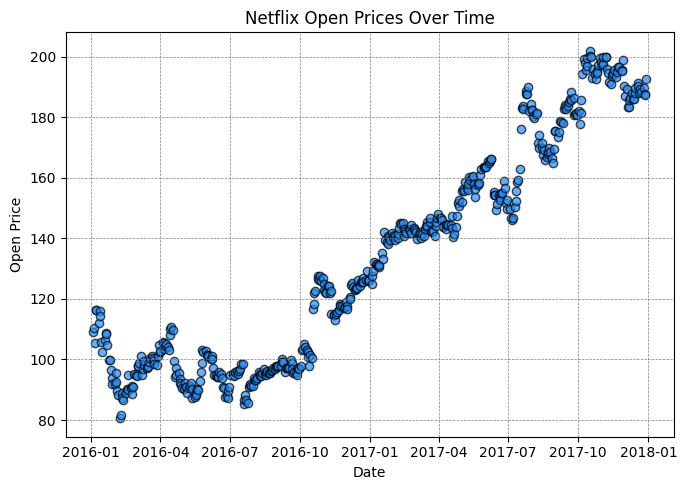

In [5]:
from pandas.plotting import register_matplotlib_converters 

register_matplotlib_converters()   # Register the date converter to ensure proper plotting of date-based data

plt.figure(figsize=(7, 5))        # Set the figure size to 10x8 inches

# Scatter plot of the 'Open' stock price against the date index
plt.scatter(df.index,              # Use the date index as the x-axis values
            df["Open"],            # Use the 'Open' price column as the y-axis values
            color='dodgerblue',    # Set scatter plot color for better visualization
            edgecolor='black',     # Make a black contour point
            alpha=0.7)             # Set transparency level to 70% for clarity

plt.xlabel("Date")                 # Label for the x-axis
plt.ylabel("Open Price")           # Label for the y-axis
plt.title("Netflix Open Prices Over Time")  # Add a title to describe the plot
plt.grid(visible=True, linestyle="--", linewidth=0.5, color="grey")  # Add gridlines with light styling

plt.tight_layout()                 # Adjust the layout to prevent element overlap
plt.show()                         # Display the scatter plot

*Scatter plot of Netflix stock price data.*

In [7]:
from scipy.stats import linregress

x = (df.index - df.index[0]).days.to_numpy()  # Convert the date index to the number of days since the first date and store as a NumPy array
y = df.Open.to_numpy()                        # Extract the 'Open' price column as a NumPy array

# Perform the Linear Regression
result = linregress(x, y)

# Print the results in a readable format
print(f"===== Linear Regression Results =====")
print(f"Slope:              {result.slope:.6f}")
print(f"Intercept:          {result.intercept:.6f}")
print(f"R-squared:          {result.rvalue**2:.6f}")        # R-squared is rvalue squared
print(f"P-Value:            {result.pvalue:.6e}")           # Use scientific notation for small p-values
print(f"Standard Error:     {result.stderr:.6f}")
print(f"Intercept StdErr:   {result.intercept_stderr:.6f}")

===== Linear Regression Results =====
Slope:              0.162191
Intercept:          74.928308
R-squared:          0.892931
P-Value:            3.213728e-245
Standard Error:     0.002509
Intercept StdErr:   1.050140


In [8]:
np.var(y) * len(y)  # Compute the variance of the 'y' array and multiply it by its length
                    # This gives the total sum of squares (TSS), a key metric in regression analysis.

653922.6311388048

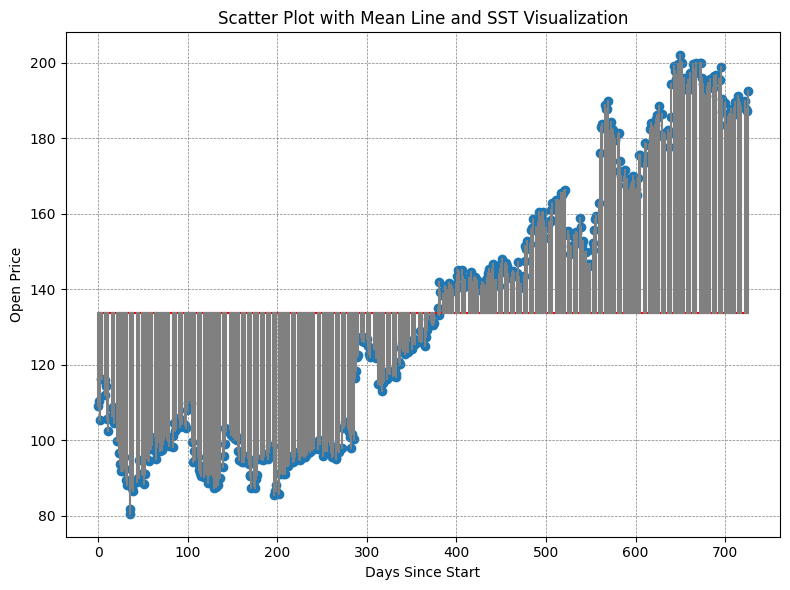

Total Sum of Squares: 653922.63


In [9]:
plt.figure(figsize=(8, 6))                           # Set the figure size to 20x8 inches for better visibility

plt.scatter(x, y)                                    # Plot a scatter plot of x (days) against y (Open prices)

y_mean = np.mean(y)                                  # Calculate the mean of 'y' values (average Open price)

plt.hlines(y_mean, np.min(x), np.max(x), color="r")  # Plot a horizontal red line at y_mean across the x range

sst = 0                                              # Initialize the total sum of squares (SST) to zero

# Loop through each x and y coordinate
for x_, y_ in zip(x, y):
    plt.plot([x_, x_],                               # Draw a vertical line for each point from y_mean to the data point
             [y_mean, y_], 
             color="gray",                           # Use gray color for the lines
             linestyle="-")                          # Use a solid line style
    sst += (y_ - y_mean) ** 2                        # Accumulate the squared differences (SST calculation)

plt.grid(visible=True, linestyle="--", linewidth=0.5, color="grey")  # Add horizontal gridlines with dashed style
plt.title("Scatter Plot with Mean Line and SST Visualization")       # Add a title
plt.xlabel("Days Since Start")                                       # Label the x-axis
plt.ylabel("Open Price")                                             # Label the y-axis
plt.tight_layout()                                                   # Adjust layout for better spacing
plt.show()                                                           # Display the plot

print("Total Sum of Squares:",sst.round(2))                          # Print the total sum of squares (SST), a measure of data variance

In [10]:
# Return the y value on the straight line defined by the slope and point (x,y) 

def x_2_y(slope, x, y, x_in):
    
    return y + slope*(x_in - x)

Sum of Squared Errors (SSE): 155865.17


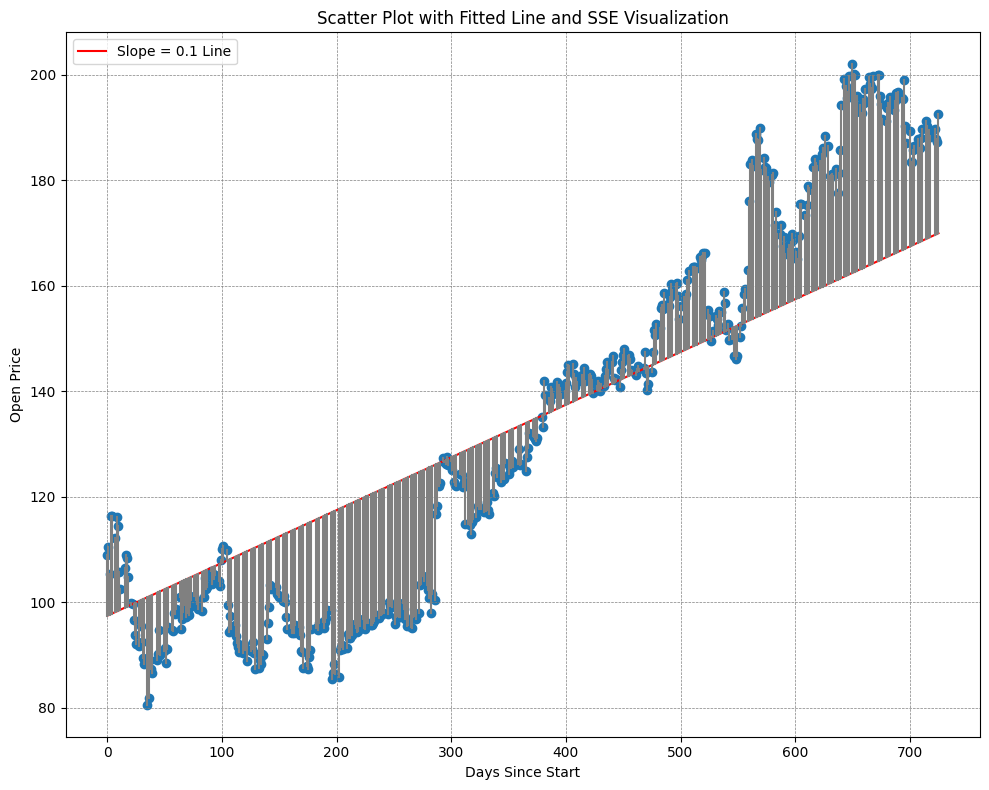

In [11]:
plt.figure(figsize=(10, 8))  # Set the figure size to 20x8 inches

plt.scatter(x, y)  # Plot the scatter plot of x (days since start) and y (Open price)

# Calculate the mean values for x and y
y_mean = np.mean(y)  # Calculate the mean of y (Open price)
x_mean = np.mean(x)  # Calculate the mean of x (Days since start)

# Plot the line with a slope of 0.1 passing through the point (x_mean, y_mean)
plt.plot(
    [np.min(x), np.max(x)],  # X range: from minimum to maximum x values
    [
        x_2_y(0.1, x_mean, y_mean, np.min(x)),  # Y value at minimum x using the line equation
        x_2_y(0.1, x_mean, y_mean, np.max(x)),  # Y value at maximum x using the line equation
    ],
    color="r",  # Set the line color to red
    label="Slope = 0.1 Line",  # Label for the red line
)

sse = 0  # Initialize the Sum of Squared Errors (SSE)
for x_, y_ in zip(x, y):                        # Loop through each x and y value
    y_on_line = x_2_y(0.1, x_mean, y_mean, x_)  # Calculate the y value on the line for given x_
    plt.plot(
        [x_, x_],                               # Draw a vertical line between the actual y_ and the line y value
        [y_on_line, y_],
        color="gray",                           # Line color: gray
        linestyle="-",                          # Solid line style
    )
    sse += (y_on_line - y_)**2  # Increment SSE with the squared difference between y_ and the line y value

print(f"Sum of Squared Errors (SSE): {sse:.2f}")                     # Print the total SSE with two decimal precision

plt.xlabel("Days Since Start")                                       # Label for x-axis
plt.ylabel("Open Price")                                             # Label for y-axis
plt.title("Scatter Plot with Fitted Line and SSE Visualization")     # Title for the plot
plt.grid(visible=True, linestyle="--", linewidth=0.5, color="grey")  # Add horizontal grid
plt.legend()                                                         # Add legend to distinguish the line

plt.tight_layout()                                                   # Adjust layout for better spacing
plt.show()                                                           # Display the plot

## SSE VS slope

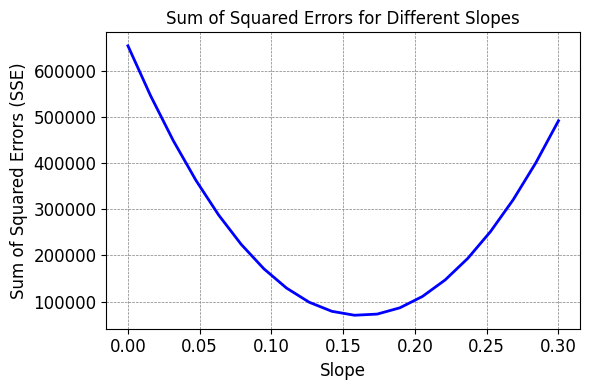

In [13]:
# Calculate the mean values of x and y
y_mean = np.mean(y)                     # Mean of y (Open price)
x_mean = np.mean(x)                     # Mean of x (Days since start)

# Generate a range of slope values to test
slopes = np.linspace(0, 0.3, 20)        # Create 20 slope values evenly spaced between 0 and 0.3
sses = [0 for _ in range(len(slopes))]  # Initialize a list to store SSE for each slope

# Calculate the SSE (Sum of Squared Errors) for each slope
for x_, y_ in zip(x, y):                # Loop through each x and y value
    for i in range(len(slopes)):        # Loop through each slope
        y_on_line = x_2_y(slopes[i], x_mean, y_mean, x_)  # Calculate y on the line for the given slope
        sses[i] += (y_on_line - y_)**2                    # Accumulate SSE for the current slope

# Plot the slopes vs. SSE values
plt.figure(figsize=(6, 4))             # Set the figure size to 10x8 inches
plt.rc('xtick', labelsize=12)           # Set font size for x-axis ticks
plt.rc('ytick', labelsize=12)           # Set font size for y-axis ticks

plt.plot(slopes, sses, color='b', linewidth=2)                        # Plot SSE against slopes with a blue line
plt.xlabel("Slope", fontsize=12)                                      # Label for the x-axis
plt.ylabel("Sum of Squared Errors (SSE)", fontsize=12)                # Label for the y-axis
plt.title("Sum of Squared Errors for Different Slopes", fontsize=12)  # Title for the plot
plt.grid(visible=True, linestyle="--", linewidth=0.5, color="grey")   # Add grid for better readability

plt.tight_layout()                      # Adjust layout
plt.show()                              # Display the plot

### 3D visualization, considering both slope and intercept

In [15]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# Function to calculate Sum of Squared Errors (SSE) for a given slope and intercept
def cal_sse(slope, intercept, x, y):  
    sse = 0                                           # Initialize SSE to 0
    for x_, y_ in zip(x, y):                          # Loop through each pair of x and y values
        y_on_line = x_2_y(slope, 0, intercept, x_)    # Calculate y value on the line for the given slope and intercept
        sse += (y_on_line - y_)**2                    # Accumulate squared error for each point
    return sse                                        # Return the total SSE

# Generate a range of slope and intercept values
slopes = np.linspace(-1, 1, 20)                       # Create 20 slope values between -1 and 1
intercepts = np.linspace(-200, 400, 20)               # Create 20 intercept values between -200 and 400

slopes, intercepts = np.meshgrid(slopes, intercepts)  # Generate a grid of (slope, intercept) pairs

# Initialize a matrix to store SSE values for each (slope, intercept) pair
sses = np.zeros(intercepts.shape)                     # Create a zero matrix of the same shape as intercepts grid

# Calculate SSE for each combination of slope and intercept
for i in range(sses.shape[0]):                        # Loop over rows (intercept values)
    for j in range(sses.shape[1]):                    # Loop over columns (slope values)
        
        # Calculate SSE for the current slope and intercept pair
        sses[i][j] = cal_sse(slopes[i][j], intercepts[i][j], x, y)  

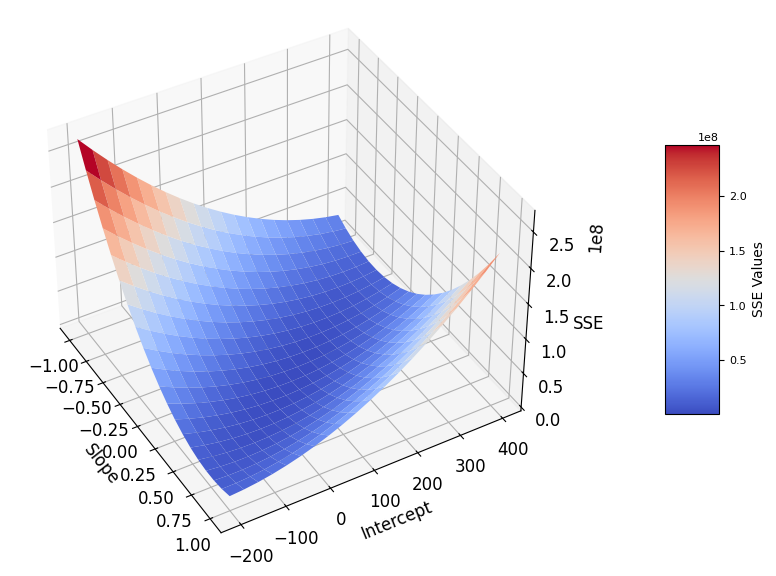

In [16]:
# Create a 3D surface plot for slopes, intercepts, and SSE values
fig = plt.figure(figsize=(10, 7))                # Initialize the figure with size 14x10 inches
ax = fig.add_subplot(111, projection='3d')       # Add a subplot with a 3D projection

# Set the viewing angle for the 3D plot
ax.view_init(40, -30)                            # Elevation = 40 degrees, Azimuth = -30 degrees

# Label the axes
ax.set_xlabel("Slope", fontsize=12)              # Label for the x-axis (slope)
ax.set_ylabel("Intercept", fontsize=12)          # Label for the y-axis (intercept)
ax.set_zlabel("SSE", fontsize=12)                # Label for the z-axis (sum of squared errors)

# Customize tick label sizes for better readability
plt.rc('xtick', labelsize=8)                     # Set x-axis tick label size
plt.rc('ytick', labelsize=8)                     # Set y-axis tick label size

# Create the 3D surface plot with a color map
surf = ax.plot_surface(slopes,                   # Grid of slopes (x-axis values)
                       intercepts,               # Grid of intercepts (y-axis values)
                       sses,                     # SSE values (z-axis values)
                       cmap=cm.coolwarm,         # Use 'coolwarm' colormap
                       linewidth=0,              # Remove line borders
                       antialiased=True)         # Smooth the surface for better aesthetics

# Add a color bar and move it more to the right using pad
colorbar = fig.colorbar(surf, shrink=0.5, aspect=5, pad=0.15)  # Adjust the pad to push colorbar
colorbar.set_label("SSE Values")                 # Add label to colorbar for clarity

plt.show()                                       # Display the 3D surface plot

## Notes on R^2
### Influence of Outlier

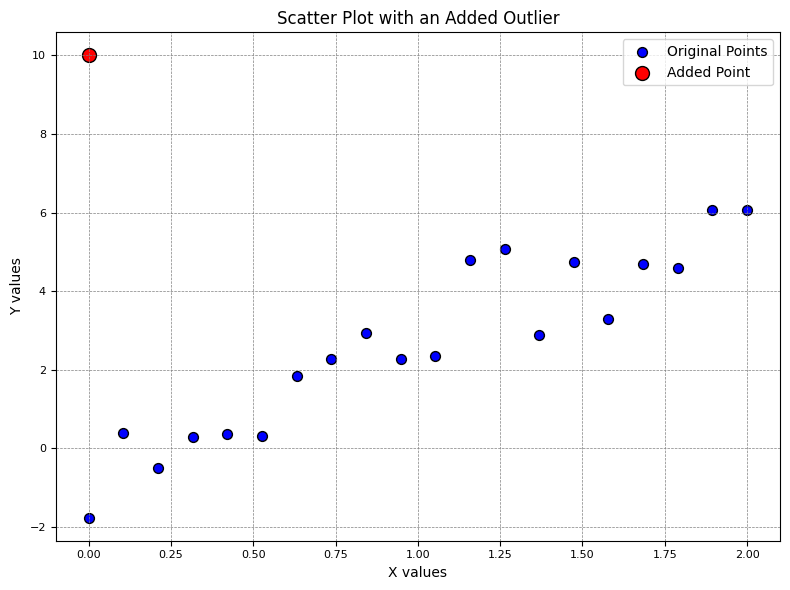

In [18]:
np.random.seed(2020)                             # Set the random seed for reproducibility

x = np.linspace(0, 2, 20)                        # Generate x values: 20 equally spaced points between 0 and 2

y = 3 * x + np.random.normal(size=len(x))        # Generate y values: Linear relation (3*x) with added random noise

# Add a new data point (0, 10) to the existing x and y arrays
x_new = np.append(x, np.array([0]))              # Append 0 to x
y_new = np.append(y, np.array([10]))             # Append 10 to y

# Plot the original scatter points
plt.figure(figsize=(8, 6))                       # Set the figure size
plt.scatter(x, y, label="Original Points",       # Scatter plot for original points
            color="blue", s=50, edgecolor="black")

# Highlight the new point (0, 10) with a distinct color
plt.scatter([0], [10], label="Added Point",      # Scatter plot for the new point
            color="red", s=100, edgecolor="black")

# Add labels and a title for better clarity
plt.xlabel("X values")                           # X-axis label
plt.ylabel("Y values")                           # Y-axis label
plt.title("Scatter Plot with an Added Outlier")  # Plot title

# Add a legend to differentiate the points
plt.legend(loc="upper right")

# Add a grid for better readability
plt.grid(visible=True, linestyle="--", linewidth=0.5, color="grey")

# Show the plot
plt.tight_layout()                           
plt.show()

In [19]:
# Perform the Linear Regression
result = linregress(x,y)

# Print the results in a readable format
print(f"===== Linear Regression Results =====")
print(f"Slope:              {result.slope:.6f}")
print(f"Intercept:          {result.intercept:.6f}")
print(f"R-squared:          {result.rvalue**2:.6f}")        # R-squared is rvalue squared
print(f"P-Value:            {result.pvalue:.6e}")           # Use scientific notation for small p-values
print(f"Standard Error:     {result.stderr:.6f}")
print(f"Intercept StdErr:   {result.intercept_stderr:.6f}")

===== Linear Regression Results =====
Slope:              3.413267
Intercept:          -0.765782
R-squared:          0.872426
P-Value:            1.764550e-09
Standard Error:     0.307645
Intercept StdErr:   0.359882


In [20]:
# Perform the Linear Regression
result = linregress(x_new,y_new)                            # With the extra point

# Print the results in a readable format
print(f"===== Linear Regression Results =====")
print(f"Slope:              {result.slope:.6f}")
print(f"Intercept:          {result.intercept:.6f}")
print(f"R-squared:          {result.rvalue**2:.6f}")        # R-squared is rvalue squared
print(f"P-Value:            {result.pvalue:.6e}")           # Use scientific notation for small p-values
print(f"Standard Error:     {result.stderr:.6f}")
print(f"Intercept StdErr:   {result.intercept_stderr:.6f}")

===== Linear Regression Results =====
Slope:              2.181038
Intercept:          0.920424
R-squared:          0.264082
P-Value:            1.717157e-02
Standard Error:     0.835279
Intercept StdErr:   0.953558


### Small R^2 may indicate you are using the wrong model from first place.

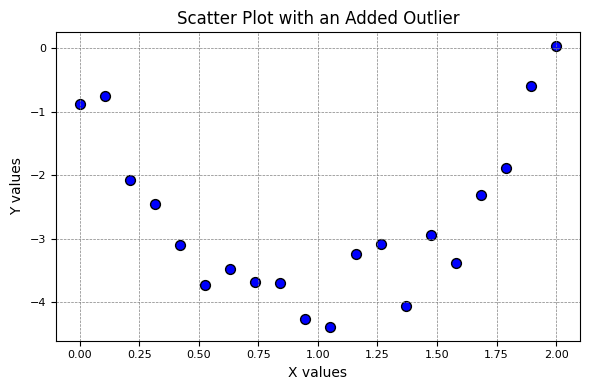

In [22]:
np.random.seed(2020)                                          # Set the random seed for reproducibility

x3 = np.linspace(0, 2, 20)                                    # Generate x values: 20 equally spaced points between 0 and 2
y3 = 4*x**2-8*x + np.random.normal(scale=0.5,size=len(x))     # Generate y values: Quadractic curve with added random noise

# Plot the original scatter points
plt.figure(figsize=(6, 4))                                    # Set the figure size
plt.scatter(x3, y3,                                           # Scatter plot for original points
            color="blue", s=50, edgecolor="black")

# Add labels and a title for better clarity
plt.xlabel("X values")                                        # X-axis label
plt.ylabel("Y values")                                        # Y-axis label
plt.title("Scatter Plot with an Added Outlier")               # Plot title

# Add a grid for better readability
plt.grid(visible=True, linestyle="--", linewidth=0.5, color="grey")

# Show the plot
plt.tight_layout()                           
plt.show()

In [23]:
# Perform the Linear Regression
result = linregress(x3,y3)                                  # With the extra point

# Print the results in a readable format
print(f"===== Linear Regression Results =====")
print(f"Slope:              {result.slope:.6f}")
print(f"Intercept:          {result.intercept:.6f}")
print(f"R-squared:          {result.rvalue**2:.6f}")        # R-squared is rvalue squared
print(f"P-Value:            {result.pvalue:.6e}")           # Use scientific notation for small p-values
print(f"Standard Error:     {result.stderr:.6f}")
print(f"Intercept StdErr:   {result.intercept_stderr:.6f}")

===== Linear Regression Results =====
Slope:              0.206633
Intercept:          -2.909207
R-squared:          0.009779
P-Value:            6.783044e-01
Standard Error:     0.490109
Intercept StdErr:   0.573328


The R2 is less than 0.01. It is not correct to apply simple linear regression on such a dataset
where nonlinearity is obvious.

### Linear Regression and Estimator

In [26]:
# Calculate x values: Convert date indices to the number of days since the first date and store as a NumPy array
x = (df.index - df.index[0]).days.to_numpy()

# Extract the 'Open' price column as y values and store as a NumPy array
y = df.Open.to_numpy()

# Compute the mean of x values
x_mean = np.mean(x)

# Compute the mean of y values
y_mean = np.mean(y)

# Calculate the slope (k) using the formula for linear regression
k = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)

# Calculate the y-intercept (b) using the regression line equation
b = y_mean - k * x_mean

# Print the slope (k) and intercept (b) of the best-fit line
print(f"Slope (k): {k:.4f}, Intercept (b): {b:.4f}")

Slope (k): 0.1622, Intercept (b): 74.9283


## Multivariate Linear Regression and Collinearity Analysis

In [28]:
url1 = ('https://raw.githubusercontent.com/PacktPublishing/Essential-Statistics-for-Non-STEM-Data-Analysts/refs/heads/master/Chapter08/exams.csv')

exam = pd.read_csv(url1)

exam.head()

,EXAM1,EXAM2,EXAM3,FINAL
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142


In [29]:
exam["index"] = exam.index                  # Add an "index" column to the DataFrame, representing the row indices

exam_long = pd.melt(                        # Reshape the DataFrame from wide to long format
    exam,                                   # The input DataFrame
    id_vars=["index"],                      # Keep the "index" column fixed
    value_vars=exam.columns[:-1]            # Reshape all columns except the last one
)[["variable", "value"]]                    # Select only the reshaped variable and value columns

exam_long.columns = ["exam_name", "score"]  # Rename the columns for better clarity

exam_long.head()                            # Display the first few rows of the original DataFrame

,exam_name,score
0,EXAM1,73
1,EXAM1,93
2,EXAM1,89
3,EXAM1,96
4,EXAM1,73


### Violin-plot

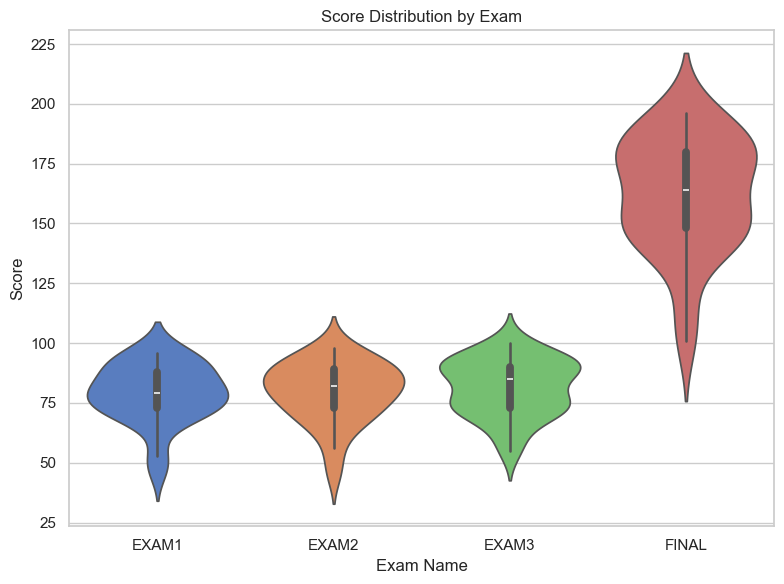

In [31]:
sns.set(style="whitegrid")  # Set the style of seaborn plots to 'whitegrid'

plt.figure(figsize=(8, 6))  # Create a figure with size 8x6 inches

# Create a violin plot to visualize the distribution of scores for each exam
sns.violinplot(
    x="exam_name",          # Set the x-axis to 'exam_name', showing categories for exams
    y="score",              # Set the y-axis to 'score', showing distribution of scores
    data=exam_long,         # Use the reshaped long-format DataFrame 'exam_long'
    hue="exam_name",        # Assign 'exam_name' to hue to resolve the warning
    palette="muted"         # Apply a color palette to differentiate exams 
)

plt.title("Score Distribution by Exam")  # Add a title to the plot for clarity
plt.xlabel("Exam Name")                  # Label the x-axis
plt.ylabel("Score")                      # Label the y-axis
plt.tight_layout()                       # Adjust layout to avoid overlaps
plt.show()                               # Display the violin plot

### Scatter plot

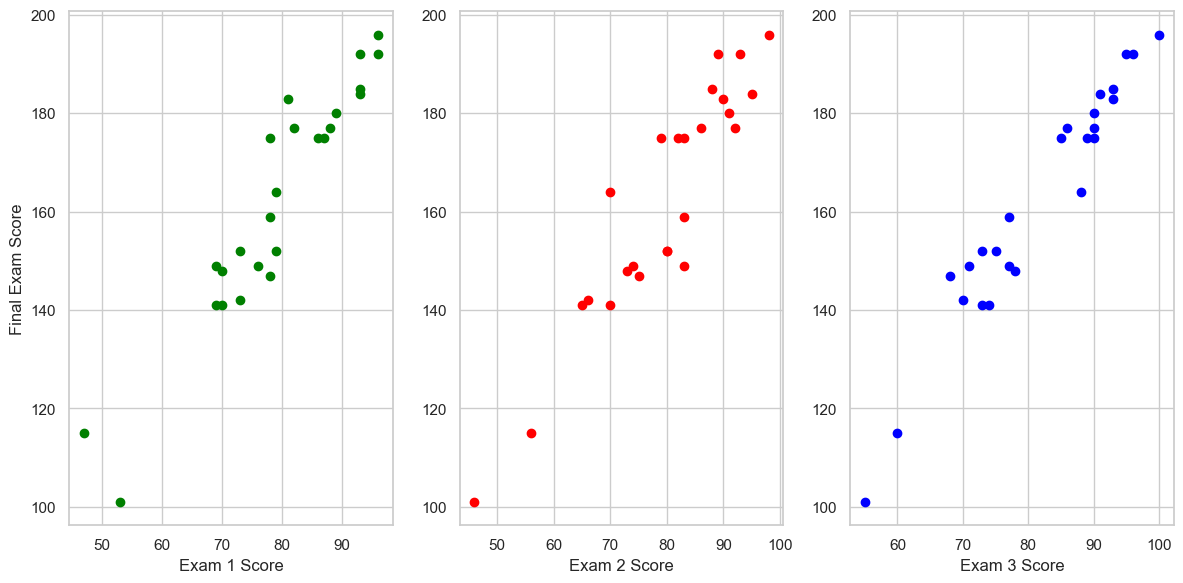

In [33]:
# Create a figure with three subplots arranged in a single row
fig, ax = plt.subplots(1, 3, figsize=(12, 6))  

# Plot a scatter plot of Exam 1 scores against Final exam scores in the first subplot
ax[0].scatter(exam.EXAM1, exam.FINAL, color="green")  
ax[0].set_xlabel("Exam 1 Score")                      # Set x-axis label for the first subplot
ax[0].set_ylabel("Final Exam Score")                 # Set y-axis label for the first subplot

# Plot a scatter plot of Exam 2 scores against Final exam scores in the second subplot
ax[1].scatter(exam.EXAM2, exam.FINAL, color="red")   
ax[1].set_xlabel("Exam 2 Score")                     # Set x-axis label for the second subplot

# Plot a scatter plot of Exam 3 scores against Final exam scores in the third subplot
ax[2].scatter(exam.EXAM3, exam.FINAL, color="blue")  # Use blue for differentiation
ax[2].set_xlabel("Exam 3 Score")                     # Set x-axis label for the third subplot

# Adjust layout for better spacing between subplots
plt.tight_layout()  

# Display the scatter plots
plt.show()  

## Ordinary Least Square (OLS)

In [35]:
import statsmodels.api as sm

# Extract the columns EXAM1, EXAM2, and EXAM3 from the exam DataFrame as a NumPy array
X = exam[["EXAM1", "EXAM2", "EXAM3"]].to_numpy()

# Add a constant column (intercept) to the independent variables for the regression model
X = sm.add_constant(X)

# Extract the dependent variable (FINAL exam scores) as a NumPy array
y = exam["FINAL"].to_numpy()

# Fit an Ordinary Least Squares (OLS) regression model using the independent and dependent variables and display the summary
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     670.1
Date:                Wed, 18 Dec 2024   Prob (F-statistic):           5.34e-21
Time:                        13:55:32   Log-Likelihood:                -57.312
No. Observations:                  25   AIC:                             122.6
Df Residuals:                      21   BIC:                             127.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.3361      3.764     -1.152      0.262     -12.164       3.492
x1             0.3559      0.121      2.932      0.008       0.103       0.608
x2             0.5425      0.101      5.379      0.000       0.333       0.752
x3             1.1674      0.103     11.333      0.000       0.953       1.382
==============================================================================
Omnibus:                        8.219   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                6.157
Skew:                           0.993   Prob(JB):                       0.0460
Kurtosis:                       4.401   Cond. No.                     1.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Covariance Matrix

In [37]:
cov_max = exam[["EXAM1","EXAM2","EXAM3"]].corr()
cov_max

,EXAM1,EXAM2,EXAM3
EXAM1,1.000000,0.901363,0.892743
EXAM2,0.901363,1.000000,0.846359
EXAM3,0.892743,0.846359,1.000000


Strong collinearity between independent variables becomes a problem because it tends to
inflate the variance of the estimated regression coefficient.

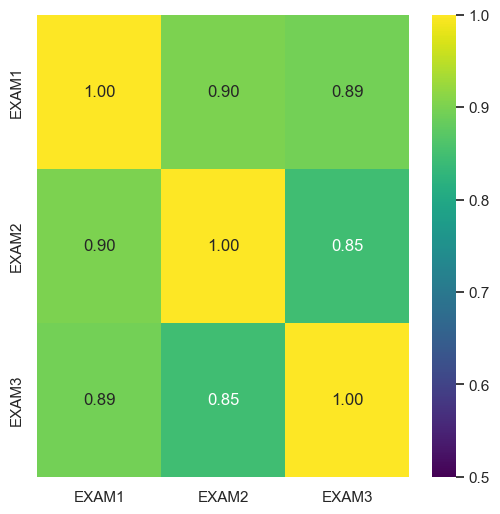

In [39]:
from seaborn import heatmap 

fig, ax = plt.subplots(figsize=(6, 6))  # Create a figure and axis with dimensions 6x6 inches

ax = heatmap(                           # Generate a heatmap to display the correlation matrix of features in X
    cov_max,                            # Compute the correlation matrix for the DataFrame X
    fmt=".2f",                          # Format the annotation text to 2 decimal places
    annot=True,                         # Annotate each cell in the heatmap with its correlation value
    ax=ax,                              # Use the specified axis for the plot
    cmap="viridis",                     # Set the color palette to 'RdBu_r' (red to blue, reversed)
    vmin=0.5,                           # Set the minimum value of the color scale to 0.5 (moderate correlation)
    vmax=1)                             # Set the maximum value of the color scale to 1 (strong positive correlation)

In [40]:
# Perform the Linear Regression
result = linregress(exam.EXAM1, exam.FINAL)                               

# Print the results in a readable format
print(f"===== Linear Regression Results =====")
print(f"Slope:              {result.slope:.6f}")
print(f"Intercept:          {result.intercept:.6f}")
print(f"R-squared:          {result.rvalue**2:.6f}")        
print(f"P-Value:            {result.pvalue:.6e}")           
print(f"Standard Error:     {result.stderr:.6f}")
print(f"Intercept StdErr:   {result.intercept_stderr:.6f}")

===== Linear Regression Results =====
Slope:              1.852455
Intercept:          15.621969
R-squared:          0.895050
P-Value:            9.543660e-13
Standard Error:     0.132267
Intercept StdErr:   10.574804


In [41]:
# Perform the Linear Regression
result = linregress(exam.EXAM2, exam.FINAL)                               

# Print the results in a readable format
print(f"===== Linear Regression Results =====")
print(f"Slope:              {result.slope:.6f}")
print(f"Intercept:          {result.intercept:.6f}")
print(f"R-squared:          {result.rvalue**2:.6f}")        
print(f"P-Value:            {result.pvalue:.6e}")           
print(f"Standard Error:     {result.stderr:.6f}")
print(f"Intercept StdErr:   {result.intercept_stderr:.6f}")

===== Linear Regression Results =====
Slope:              1.787338
Intercept:          19.982400
R-squared:          0.863917
P-Value:            1.923808e-11
Standard Error:     0.147914
Intercept StdErr:   11.895019


Are their quantitative ways to detect collinearity? There are two common methods.They are listed here. The first one pre-examines variables and the second one checks the**Variance Inflation Factor (VIF)**:

In [43]:
# Extract the columns EXAM2 and EXAM3 from the exam DataFrame as a NumPy array
X = exam[["EXAM2", "EXAM3"]].to_numpy()

# Add a constant column (intercept) to the independent variables for the regression model
X = sm.add_constant(X)
X

array([[  1.,  80.,  75.],
       [  1.,  88.,  93.],
       [  1.,  91.,  90.],
       [  1.,  98., 100.],
       [  1.,  66.,  70.],
       [  1.,  46.,  55.],
       [  1.,  74.,  77.],
       [  1.,  56.,  60.],
       [  1.,  79.,  90.],
       [  1.,  70.,  88.],
       [  1.,  70.,  73.],
       [  1.,  65.,  74.],
       [  1.,  95.,  91.],
       [  1.,  80.,  73.],
       [  1.,  73.,  78.],
       [  1.,  89.,  96.],
       [  1.,  75.,  68.],
       [  1.,  90.,  93.],
       [  1.,  92.,  86.],
       [  1.,  83.,  77.],
       [  1.,  86.,  90.],
       [  1.,  82.,  89.],
       [  1.,  83.,  85.],
       [  1.,  83.,  71.],
       [  1.,  93.,  95.]])

In [44]:
# Extract the dependent variable (EXAM1 scores) as a NumPy array
y = exam["EXAM1"].to_numpy()
y

array([73, 93, 89, 96, 73, 53, 69, 47, 87, 79, 69, 70, 93, 79, 70, 93, 78,
       81, 88, 78, 82, 86, 78, 76, 96], dtype=int64)

In [45]:
# Fit an Ordinary Least Squares (OLS) regression model and calculate the R-squared value
r2 = sm.OLS(y, X).fit().rsquared
r2

0.8719071131647402

In [46]:
Vif = 1/(1-r2)
Vif

7.806834748646892

The result is around 0.872. Therefore, the VIF is about 7.8. This is already a big value.
A VIF greater than 10 suggests serious collinearity.

Is collinearity an issue? The answer is yes and no. It depends on our goals. If our goal is to predict the independent variable as accurately as possible, then it is not an issue. However, in most cases, we don't want to carry unnecessary complexity and redundancy in the model. 

There are several ways to get rid of collinearity:

    • Select independent variables and drop the rest. This may lose information.

    • Obtain more data. More data brings diversity into the model and will reduce the variance.

    • Use Principle Component Analysis (PCA) to transform the independent variables into fewer new variables. We will not cover it here because of space limitations. The idea is to bundle the variance explainability of independent variables together, in a new variable.

    • Use lasso regression. Lasso regression is regression with regularization of L1- norm.

## Lasso Regression and Regularization

In [50]:
from sklearn import linear_model

X = exam[["EXAM1","EXAM2","EXAM3"]].to_numpy()
y = exam["FINAL"].to_numpy()

X[:5]

array([[ 73,  80,  75],
       [ 93,  88,  93],
       [ 89,  91,  90],
       [ 96,  98, 100],
       [ 73,  66,  70]], dtype=int64)

In [51]:
alpha = 0.1                                                   # Regularization parameter for Lasso and Ridge regression

# Initialize a Linear Regression model
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X, y)                                    # Fit the Linear Regression model to the data

# Initialize a Lasso Regression model with the specified alpha value
lasso_regressor = linear_model.Lasso(alpha=alpha)
lasso_regressor.fit(X, y)                                     # Fit the Lasso Regression model to the data

# Initialize a Ridge Regression model with the specified alpha scaled by the sample size
ridge_regressor = linear_model.Ridge(alpha=alpha * len(y) * 2)
ridge_regressor.fit(X, y)                                     # Fit the Ridge Regression model to the data

# Print the coefficients for each regression model
print("Linear model coefficients: ", linear_regressor.coef_)  # Coefficients from Linear Regression
print("Lasso model coefficients: ", lasso_regressor.coef_)    # Coefficients from Lasso Regression
print("Ridge model coefficients: ", ridge_regressor.coef_)    # Coefficients from Ridge Regression

Linear model coefficients:  [0.35593822 0.54251876 1.16744422]
Lasso model coefficients:  [0.35537305 0.54236992 1.16735218]
Ridge model coefficients:  [0.3609811  0.54233219 1.16116573]


1. Linear Model Coefficients

Coefficients: [0.35593822, 0.54251876, 1.16744422]

    This is the standard Linear Regression without any regularization.
    The model minimizes the sum of squared residuals (errors) to determine the best-fit line.
    These coefficients reflect the direct influence of each feature on the target variable.
    Linear regression is prone to overfitting, especially with many predictors or collinear features.

2. Lasso Regression Coefficients

Coefficients: [0.35537305, 0.54236992, 1.16735218]

    Lasso regression includes L1 regularization, which adds a penalty proportional to the absolute value of the coefficients.
    The slight shrinkage in the coefficients compared to the linear model (0.35593822 → 0.35537305, etc.) indicates that Lasso is penalizing larger coefficients.
    Key Point: Lasso can shrink some coefficients to exactly zero, effectively selecting features. However, in this case, the coefficients are not reduced to zero, likely due to strong feature relevance.

3. Ridge Regression Coefficients
   
Coefficients: [0.3609811, 0.54233219, 1.16116573]

    Ridge regression includes L2 regularization, which adds a penalty proportional to the square of the coefficients.
    The coefficients are also slightly smaller than those in linear regression, but the reduction is smoother compared to Lasso (1.16744422 → 1.16116573).
    Key Point: Ridge shrinks all coefficients but does not set any of them to zero, ensuring all features are retained.

#### In practical terms:

    Linear Model: No bias introduced, but risk of overfitting.
    Lasso: Slight bias with potential for feature selection.
    Ridge: Reduces coefficient magnitudes but retains all predictors.

### Coefficient Magnitude versus Regularization Coefficient

Next, I will generate a set of data varying α. I will plot the scale of the three coefficients
with respect to increasing α:

In [55]:
# Initialize a linear regression model
linear_regressor = linear_model.LinearRegression()  
linear_regressor.fit(X, y)                                      # Fit the linear regression model to the data
linear_coefficient = np.array([linear_regressor.coef_] * 20).T  # Replicate the linear coefficients for plotting

# Initialize empty lists to store coefficients for Lasso and Ridge models
lasso_coefficient = []                                          # List to store Lasso regression coefficients
ridge_coefficient = []                                          # List to store Ridge regression coefficients

# Define a range of alpha values for regularization
alphas = np.linspace(1, 400, 20)                                # Generate 20 evenly spaced alpha values between 1 and 400

# Loop through each alpha value
for alpha in alphas:
    lasso_regressor = linear_model.Lasso(alpha=alpha)           # Initialize a Lasso regression model with the current alpha
    lasso_regressor.fit(X, y)                                   # Fit the Lasso model to the data
    ridge_regressor = linear_model.Ridge(alpha=alpha * len(y) * 2)  # Initialize a Ridge model with scaled alpha
    ridge_regressor.fit(X, y)                                   # Fit the Ridge model to the data
    lasso_coefficient.append(lasso_regressor.coef_)             # Append the Lasso coefficients to the list
    ridge_coefficient.append(ridge_regressor.coef_)             # Append the Ridge coefficients to the list

# Convert the Lasso and Ridge coefficient lists to NumPy arrays and transpose
lasso_coefficient = np.array(lasso_coefficient).T               # Convert Lasso coefficients to a transposed NumPy array
ridge_coefficient = np.array(ridge_coefficient).T               # Convert Ridge coefficients to a transposed NumPy array

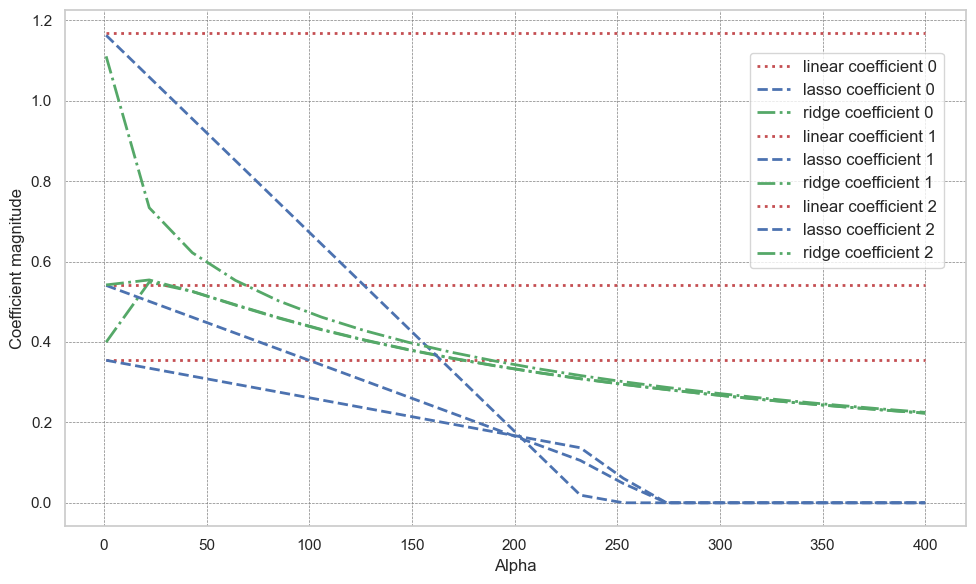

In [56]:
plt.figure(figsize=(10, 6))              # Set the figure size for the plot

# Loop through each coefficient (3 features in this case)
for i in range(3):  
    
    # Plot the linear regression coefficient as a horizontal line
    plt.plot(
        alphas,                          # Alpha values on the x-axis
        linear_coefficient[i],           # Linear coefficient for feature i
        label=f"linear coefficient {i}", # Label for the linear coefficient
        c="r",                           # Red color for the line
        linestyle=":",                   # Use a dotted line style
        linewidth=2)                     # Line width
    
    # Plot the Lasso regression coefficients as a function of alpha
    plt.plot(
        alphas,                          # Alpha values on the x-axis
        lasso_coefficient[i],            # Lasso coefficient for feature i
        label=f"lasso coefficient {i}",  # Label for the Lasso coefficient
        c="b",                           # Blue color for the line
        linestyle="--",                  # Use a dashed line style
        linewidth=2)                     # Line width
    
    # Plot the Ridge regression coefficients as a function of alpha
    plt.plot(
        alphas,                          # Alpha values on the x-axis
        ridge_coefficient[i],            # Ridge coefficient for feature i
        label=f"ridge coefficient {i}",  # Label for the Ridge coefficient
        c="g",                           # Green color for the line
        linestyle="-.",                  # Use a dash-dot line style
        linewidth=2)                     # Line width

# Add a legend to the plot
plt.legend(
    loc=(0.76, 0.5),  # Set the legend position
    fontsize=12)      # Set the font size of the legend

# Add labels and title to the plot
plt.xlabel("Alpha")                                                  # Label for the x-axis
plt.ylabel("Coefficient magnitude")                                  # Label for the y-axis
plt.grid(visible=True, linestyle="--", color="grey", linewidth=0.5)  # Add a grid with dashed grey lines
plt.tight_layout()                                                   # Adjust layout to prevent overlap
plt.show()                                                           # Display the plot

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV, RidgeCV

# Lasso Cross-Validation
lasso_cv = LassoCV(alphas=np.linspace(0.1, 200, 50), cv=5).fit(X, y)
print("Best Alpha for Lasso:", lasso_cv.alpha_)

# Ridge Cross-Validation
ridge_cv = RidgeCV(alphas=np.linspace(0.1, 200, 50), cv=5).fit(X, y)
print("Best Alpha for Ridge:", ridge_cv.alpha_)

Best Alpha for Lasso: 0.1
Best Alpha for Ridge: 28.65714285714286
